In [1]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score 


In [4]:
data=pd.read_csv("C:/Users/Arunima/Downloads/diabetes.csv")

In [5]:
data.head()

,Unnamed: 0,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [23]:
data.columns()


TypeError: 'Index' object is not callable

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  403 non-null    int64  
 1   id          403 non-null    int64  
 2   chol        402 non-null    float64
 3   stab.glu    403 non-null    int64  
 4   hdl         402 non-null    float64
 5   ratio       402 non-null    float64
 6   glyhb       390 non-null    float64
 7   location    403 non-null    object 
 8   age         403 non-null    int64  
 9   gender      403 non-null    object 
 10  height      398 non-null    float64
 11  weight      402 non-null    float64
 12  frame       391 non-null    object 
 13  bp.1s       398 non-null    float64
 14  bp.1d       398 non-null    float64
 15  bp.2s       141 non-null    float64
 16  bp.2d       141 non-null    float64
 17  waist       401 non-null    float64
 18  hip         401 non-null    float64
 19  time.ppn    400 non-null    f

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  403 non-null    int64  
 1   id          403 non-null    int64  
 2   chol        402 non-null    float64
 3   stab.glu    403 non-null    int64  
 4   hdl         402 non-null    float64
 5   ratio       402 non-null    float64
 6   glyhb       390 non-null    float64
 7   location    403 non-null    object 
 8   age         403 non-null    int64  
 9   gender      403 non-null    object 
 10  height      398 non-null    float64
 11  weight      402 non-null    float64
 12  frame       391 non-null    object 
 13  bp.1s       398 non-null    float64
 14  bp.1d       398 non-null    float64
 15  bp.2s       141 non-null    float64
 16  bp.2d       141 non-null    float64
 17  waist       401 non-null    float64
 18  hip         401 non-null    float64
 19  time.ppn    400 non-null    f

In [10]:
data.describe()

,Unnamed: 0,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
count,403.000000,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,141.000000,141.000000,401.000000,401.000000,400.000000
mean,201.000000,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,152.382979,92.524823,37.900249,43.039900,341.250000
std,116.480327,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,21.712952,11.555198,5.729313,5.656713,309.540953
min,0.000000,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,110.000000,60.000000,26.000000,30.000000,5.000000
25%,100.500000,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,138.000000,84.000000,33.000000,39.000000,90.000000
50%,201.000000,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,149.000000,92.000000,37.000000,42.000000,240.000000
75%,301.500000,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,161.000000,100.000000,41.000000,46.000000,517.500000
max,402.000000,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,238.000000,124.000000,56.000000,64.000000,1560.000000


In [11]:
data.isna().any()

Unnamed: 0    False
id            False
chol           True
stab.glu      False
hdl            True
ratio          True
glyhb          True
location      False
age           False
gender        False
height         True
weight         True
frame          True
bp.1s          True
bp.1d          True
bp.2s          True
bp.2d          True
waist          True
hip            True
time.ppn       True
dtype: bool

In [12]:
correlation_metrics = data.corr() 
fig = plt.figure(figsize = (14, 9)) 

<Figure size 1008x648 with 0 Axes>

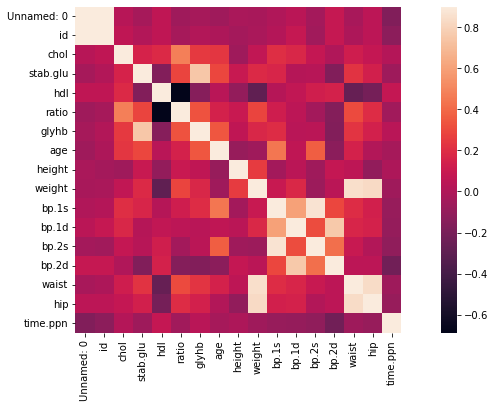

            Unnamed: 0        id      chol  stab.glu       hdl     ratio  \
Unnamed: 0    1.000000  0.928361  0.031648 -0.033336  0.060509 -0.056262   
id            0.928361  1.000000  0.059243  0.009315  0.059255 -0.034094   
chol          0.031648  0.059243  1.000000  0.150092  0.186581  0.475521   
stab.glu     -0.033336  0.009315  0.150092  1.000000 -0.161899  0.280349   
hdl           0.060509  0.059255  0.186581 -0.161899  1.000000 -0.686907   
ratio        -0.056262 -0.034094  0.475521  0.280349 -0.686907  1.000000   
glyhb        -0.031992  0.010378  0.247099  0.749236 -0.149145  0.328665   
age          -0.057495 -0.011083  0.233119  0.289258  0.038088  0.148510   
height       -0.019769 -0.036948 -0.058858  0.090669 -0.101419  0.094335   
weight       -0.024549 -0.018658  0.066889  0.185453 -0.290983  0.281649   
bp.1s         0.005968  0.013715  0.203344  0.166467  0.019804  0.119386   
bp.1d         0.043397  0.084001  0.171605  0.022014  0.065732  0.048193   
bp.2s       

In [18]:
correlation_metrics = data.corr() 
fig = plt.figure(figsize = (14, 6)) 
sns.heatmap(correlation_metrics, vmax = .9, square = True)
plt.show()
print(correlation_metrics)

KeyError: 'Outcome'

NameError: name 'result' is not defined